In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('data/ossl_all_L0_v1.2.csv')

C:\Users\KORISNIK\AppData\Local\Temp\ipykernel_1436\2291480009.py:1: DtypeWarning: Columns (1,4,5,6,15,16,17,21,25,62,111,112,113,114,115,116,117,118,119,120,121,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ossl_all_L0_v1.2.csv')


In [3]:
mir_columns = []
visnir_columns = []

mir_wavelengths = []
visnir_wavelengths = []

for column in df.columns:
    if 'scan_mir' in column:
        mir_columns.append(column)
        mir_wavelengths.append(column[9:len(column)-4])
    elif 'scan_visnir' in column:
        visnir_columns.append(column)
        visnir_wavelengths.append(column[12:len(column)-4])

# CLAY

## KSSL MIR

In [4]:
columns = []
columns.append('clay.tot_usda.a334_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,clay.tot_usda.a334_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,28.18974,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,35.69188,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,46.83406,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,41.82922,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,35.48168,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,14.00321,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,11.33887,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,23.35984,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,24.88940,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [6]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['clay.tot_usda.a334_w.pct']

RMSE: 27.863568712840003
R^2: 0.8932145952595795
bias: 3.4983047535552925
RPIQ: 0.7774739050724079


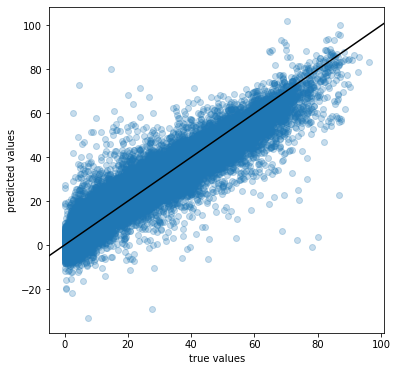

In [9]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [14]:
columns = []
columns.append('clay.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,clay.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,7.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,13.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,40.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,26.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,22.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,50.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,32.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,34.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,10.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [15]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['clay.tot_iso.11277_w.pct']

RMSE: 53.33969043293873
R^2: 0.67304152349177
bias: 5.369503102302196
RPIQ: 0.29640601423732127


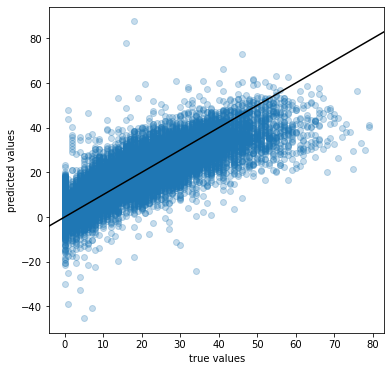

In [18]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# SAND

## KSSL MIR

In [19]:
columns = []
columns.append('sand.tot_usda.c60_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,sand.tot_usda.c60_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,31.3,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,31.3,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,24.8,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,27.0,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,31.1,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,59.5,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,67.6,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,40.1,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,23.6,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [20]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['sand.tot_usda.c60_w.pct']

RMSE: 100.4729103406057
R^2: 0.8811088232187654
bias: 7.098279460653639
RPIQ: 0.4122212402957065


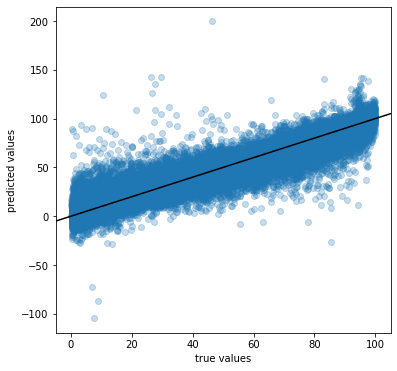

In [21]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [22]:
columns = []
columns.append('sand.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,sand.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,48.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,60.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,8.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,56.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,37.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,23.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,39.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,43.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,79.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [23]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['sand.tot_iso.11277_w.pct']

RMSE: 361.4868766708928
R^2: 0.4613150866905281
bias: 15.0484794490834
RPIQ: 0.07675732263382842


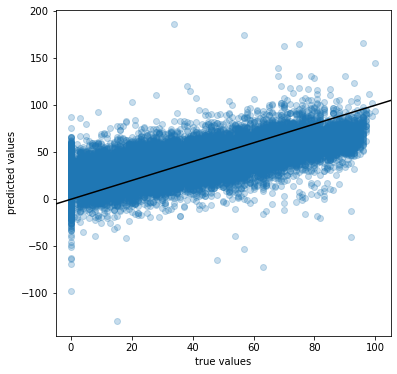

In [24]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# SILT

## KSSL MIR

In [25]:
columns = []
columns.append('silt.tot_usda.c62_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,silt.tot_usda.c62_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,40.5,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,33.0,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,28.4,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,31.2,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,33.4,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,26.5,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,21.1,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,36.5,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,51.5,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [26]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['silt.tot_usda.c62_w.pct']

RMSE: 83.50015607558989
R^2: 0.7993886865168197
bias: 6.594133704273703
RPIQ: 0.31140512790508224


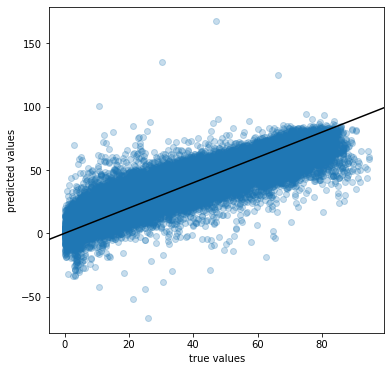

In [27]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [29]:
columns = []
columns.append('silt.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,silt.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,45.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,27.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,52.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,18.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,41.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,27.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,28.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,23.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,11.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [30]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['silt.tot_iso.11277_w.pct']

RMSE: 185.0161690518463
R^2: 0.4846366652602542
bias: 10.787994722559382
RPIQ: 0.10724279018501208


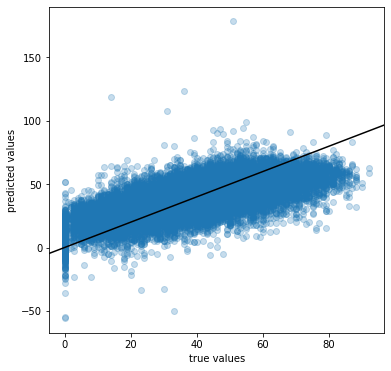

In [31]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# ORGANIC CARBON

## KSSL MIR

In [32]:
columns = []
columns.append('oc_usda.c729_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,oc_usda.c729_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,2.9100,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.8900,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.0000,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.4800,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.1208,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.5084,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.3148,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.6312,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.2508,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [33]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['oc_usda.c729_w.pct']

RMSE: 2.3013208103661444
R^2: 0.9764285215686574
bias: 0.8738695910354763
RPIQ: 1.0760714974728776


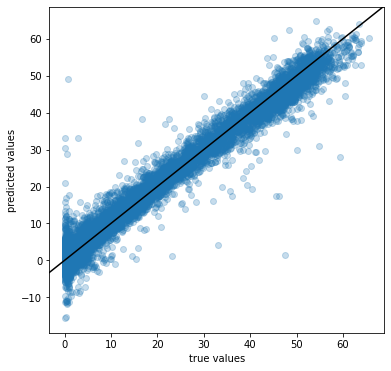

In [34]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [35]:
columns = []
columns.append('oc_iso.10694_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,oc_iso.10694_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,9.11,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,2.14,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,1.56,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,1.98,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,3.35,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.84,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,1.08,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.67,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.57,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [37]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['oc_iso.10694_w.pct']

RMSE: 11.738534479328079
R^2: 0.832157380049328
bias: 2.1355306081241157
RPIQ: 0.37290780823394587


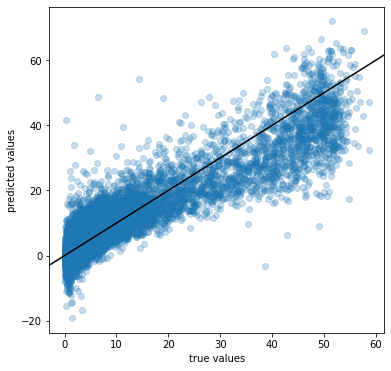

In [38]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# TOTAL CARBON

## KSSL MIR

In [39]:
columns = []
columns.append('c.tot_usda.a622_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,c.tot_usda.a622_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,2.91440,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.89126,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.00051,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.48350,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.25695,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.71266,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.55271,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.68971,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,1.55503,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [40]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['c.tot_usda.a622_w.pct']

RMSE: 3.815116548135277
R^2: 0.9793097934783237
bias: 1.1228180855132621
RPIQ: 1.1273084055058105


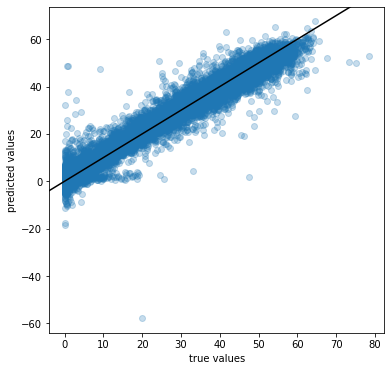

In [41]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [47]:
columns = []
columns.append('c.tot_usda.a622_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,c.tot_usda.a622_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,1.87709,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,2.03902,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,2.98289,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,3.27698,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,3.36873,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,0.99338,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,2.10827,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,0.99398,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,4.58924,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [48]:
X = pd.DataFrame(data=data[visnir_columns], columns=visnir_columns)
y = data['c.tot_usda.a622_w.pct']

RMSE: 40.86112698633232
R^2: 0.8687081358597922
bias: 4.5547715325403155
RPIQ: 0.540606278925925


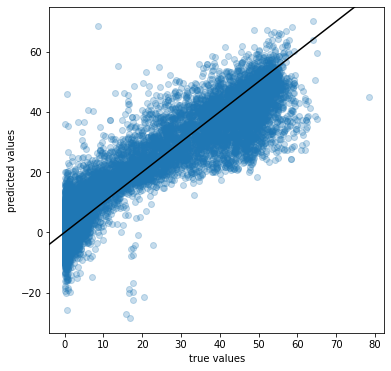

In [49]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CALCIUM CARBONATE

## KSSL MIR

In [50]:
columns = []
columns.append('caco3_usda.a54_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_usda.a54_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7892,1.15654,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
7893,7.79477,1.63972,1.64560,1.65168,1.65828,1.67122,1.67840,1.68572,1.69088,1.69547,...,0.21335,0.21278,0.21240,0.21192,0.21130,0.21072,0.21018,0.20965,0.20912,0.20855
7894,14.59579,1.55310,1.55728,1.56250,1.56868,1.58017,1.58632,1.59285,1.59746,1.60127,...,0.14095,0.14043,0.14005,0.13960,0.13908,0.13848,0.13800,0.13750,0.13705,0.13650
7901,4.91013,1.54258,1.55012,1.55903,1.56913,1.58892,1.59994,1.61226,1.62191,1.62944,...,0.18000,0.17968,0.17945,0.17920,0.17892,0.17860,0.17830,0.17802,0.17768,0.17730
7902,5.27398,1.53715,1.53960,1.54590,1.55645,1.58089,1.59646,1.61428,1.62955,1.64274,...,0.16978,0.16958,0.16947,0.16935,0.16925,0.16908,0.16890,0.16873,0.16855,0.16835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.67679,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.96300,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.49272,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,10.91097,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [51]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['caco3_usda.a54_w.pct']

RMSE: 4.221122370397092
R^2: 0.9757855472183509
bias: 0.9046725359263064
RPIQ: 2.516340280342687


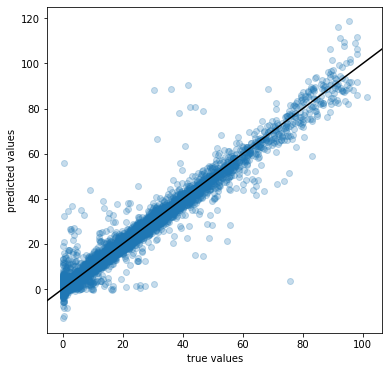

In [52]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [53]:
columns = []
columns.append('caco3_usda.a54_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_usda.a54_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18154,11.70912,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,19.17386,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,24.71582,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
18157,23.41195,0.114614,0.107037,0.108397,0.104465,0.106687,0.103698,0.106330,0.106408,0.104295,...,0.459933,0.458683,0.457679,0.456765,0.455724,0.454718,0.454004,0.453157,0.452541,0.451932
18158,22.90334,0.116095,0.108076,0.111325,0.108251,0.112229,0.108385,0.107814,0.109524,0.109611,...,0.464363,0.463432,0.462363,0.461403,0.460050,0.459393,0.458799,0.457731,0.457544,0.457192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95465,0.08360,0.099467,0.093240,0.108038,0.098440,0.088737,0.098356,0.098217,0.088650,0.093477,...,0.258237,0.258090,0.257298,0.255707,0.254340,0.253708,0.253343,0.252054,0.251013,0.250153
95466,0.08664,0.153284,0.148737,0.145614,0.139687,0.138406,0.140155,0.142946,0.131388,0.131516,...,0.407116,0.405612,0.404413,0.403627,0.402223,0.401902,0.401593,0.400400,0.399327,0.398628
95467,0.08191,0.147627,0.135499,0.135141,0.135262,0.127226,0.131343,0.129070,0.121714,0.120202,...,0.429762,0.428401,0.427610,0.426567,0.425907,0.425319,0.424506,0.423588,0.422193,0.421651
95474,0.24428,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [54]:
X = pd.DataFrame(data=data[visnir_columns], columns=visnir_columns)
y = data['caco3_usda.a54_w.pct']

RMSE: 24.667951586552594
R^2: 0.7622642727864682
bias: 3.1140933236079253
RPIQ: 0.23078348327326884


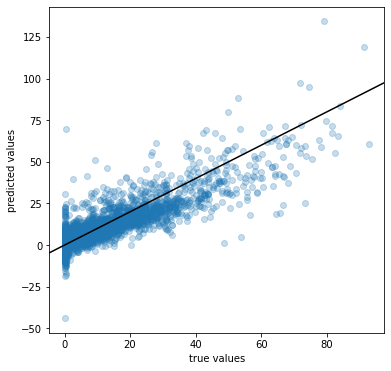

In [55]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [56]:
columns = []
columns.append('caco3_iso.10693_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_iso.10693_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.2,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.1,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,0.1,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,0.1,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,0.1,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.1,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.2,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.8,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.3,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [57]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['caco3_iso.10693_w.pct']

RMSE: 19.976105644985186
R^2: 0.8840625446295899
bias: 2.5763154091212903
RPIQ: 0.24874986704341617


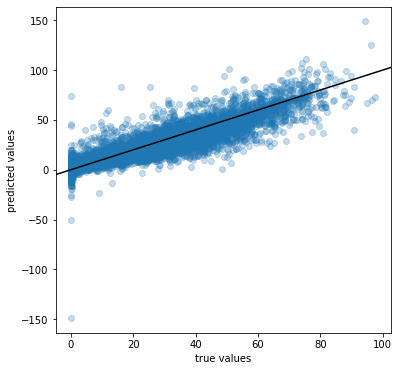

In [58]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# pH

## KSSL MIR

In [59]:
columns = []
columns.append('ph.h2o_usda.a268_index')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ph.h2o_usda.a268_index,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,5.67,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,5.86,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,6.48,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,7.54,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,8.27,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,8.11,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,8.17,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,8.13,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,8.44,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [60]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['ph.h2o_usda.a268_index']

RMSE: 0.2860580955498437
R^2: 0.8365226337975673
bias: 0.39654437089023886
RPIQ: 6.058680464550165


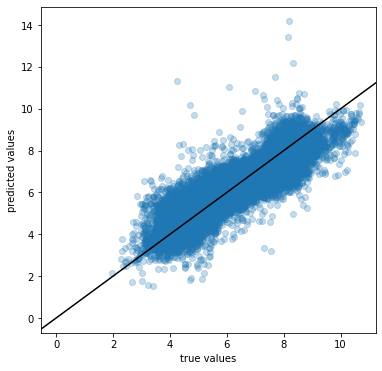

In [61]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [62]:
columns = []
columns.append('ph.h2o_iso.10390_index')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ph.h2o_iso.10390_index,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,4.00,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,6.53,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,7.14,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,4.83,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,5.74,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,6.97,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,7.79,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,7.80,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,8.05,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [63]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['ph.h2o_iso.10390_index']

RMSE: 0.25833963472245386
R^2: 0.8582900544323334
bias: 0.3876735848699229
RPIQ: 7.946267075221305


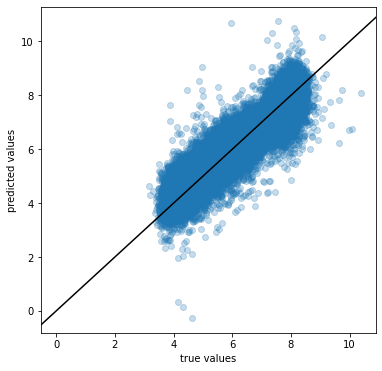

In [64]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# BULK DENSITY

## KSSL MIR

In [71]:
columns = []
columns.append('bd_usda.a4_g.cm3')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,bd_usda.a4_g.cm3,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,1.10815,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.31134,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.37769,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,1.49334,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,1.55718,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.36866,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.22590,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,1.27768,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,1.32984,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [72]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['bd_usda.a4_g.cm3']

RMSE: 0.05957985549232317
R^2: 0.6476560809809342
bias: 0.17185404533386425
RPIQ: 8.589619317889426


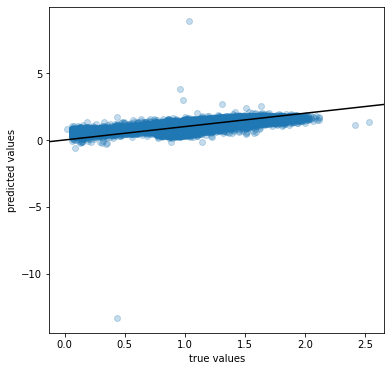

In [73]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [68]:
columns = []
columns.append('bd_usda.a4_g.cm3')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,bd_usda.a4_g.cm3,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,1.14756,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,1.31548,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,1.31010,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,1.13472,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,1.30826,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,1.33984,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,1.34513,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,1.31742,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,0.83309,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [69]:
X = pd.DataFrame(data=data[visnir_columns], columns=visnir_columns)
y = data['bd_usda.a4_g.cm3']

RMSE: 0.0778384598552037
R^2: 0.5544926852178731
bias: 0.22175536334695017
RPIQ: 6.859801737395924


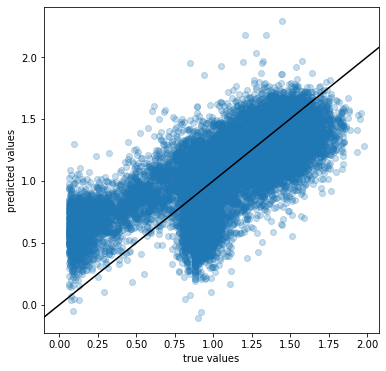

In [70]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# ELECTRICAL CONDUCTIVITY

## KSSL MIR

In [74]:
columns = []
columns.append('ec_usda.a364_ds.m')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ec_usda.a364_ds.m,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7901,2.20,1.54258,1.55012,1.55903,1.56913,1.58892,1.59994,1.61226,1.62191,1.62944,...,0.18000,0.17968,0.17945,0.17920,0.17892,0.17860,0.17830,0.17802,0.17768,0.17730
7902,3.24,1.53715,1.53960,1.54590,1.55645,1.58089,1.59646,1.61428,1.62955,1.64274,...,0.16978,0.16958,0.16947,0.16935,0.16925,0.16908,0.16890,0.16873,0.16855,0.16835
7903,9.14,1.51638,1.52640,1.53808,1.55170,1.57853,1.59319,1.60908,1.62206,1.63456,...,0.19585,0.19552,0.19532,0.19515,0.19490,0.19467,0.19438,0.19408,0.19375,0.19348
7905,2.64,1.45608,1.46058,1.46790,1.47800,1.49969,1.51299,1.52768,1.53954,1.55004,...,0.21283,0.21258,0.21242,0.21230,0.21205,0.21180,0.21160,0.21133,0.21108,0.21085
7906,3.53,1.50898,1.51235,1.51772,1.52475,1.54024,1.54961,1.55875,1.56521,1.57052,...,0.18675,0.18645,0.18632,0.18612,0.18575,0.18540,0.18505,0.18478,0.18455,0.18428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.12,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.11,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.12,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.24,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [75]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['ec_usda.a364_ds.m']

RMSE: 74.01310071470257
R^2: 0.5139646958860882
bias: 4.010056367161992
RPIQ: 0.072644506267287


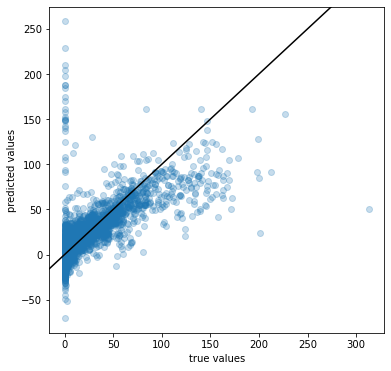

In [76]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [77]:
columns = []
columns.append('ec_iso.11265_ds.m')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ec_iso.11265_ds.m,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
113869,0.1814,0.173346,0.159692,0.147878,0.138147,0.130453,0.124555,0.120148,0.116944,0.114679,...,0.344580,0.344050,0.343513,0.343058,0.342691,0.342355,0.342048,0.341837,0.341747,0.341728
113870,0.1481,0.251348,0.232561,0.216216,0.202723,0.191893,0.183363,0.176812,0.171901,0.168282,...,0.475101,0.474677,0.474293,0.473987,0.473781,0.473655,0.473584,0.473643,0.473838,0.474198
113871,0.2810,0.161221,0.148654,0.137825,0.128942,0.121964,0.116652,0.112707,0.109858,0.107865,...,0.273004,0.272162,0.271325,0.270574,0.269921,0.269343,0.268824,0.268344,0.267915,0.267430
113872,0.0537,0.186592,0.170279,0.156208,0.144598,0.135380,0.128286,0.122970,0.119066,0.116230,...,0.441528,0.441024,0.440526,0.440109,0.439803,0.439550,0.439345,0.439247,0.439261,0.439353
113873,0.2160,0.173072,0.159340,0.147474,0.137704,0.129969,0.124029,0.119585,0.116345,0.114038,...,0.344269,0.343284,0.342273,0.341352,0.340577,0.339950,0.339486,0.339197,0.339042,0.338915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.2110,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.1084,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.1509,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.1550,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [78]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['ec_iso.11265_ds.m']

RMSE: 0.06526876638656474
R^2: 0.4138398997533388
bias: 0.1481708969450391
RPIQ: 3.2330913580788616


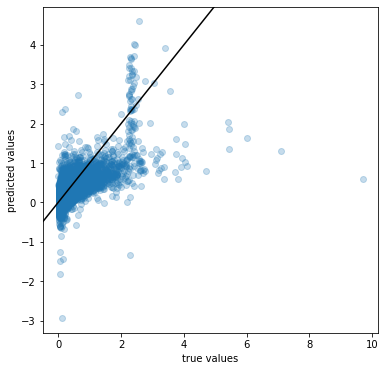

In [79]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CATION EXCHANGE CAPACITY

## KSSL MIR

In [80]:
columns = []
columns.append('cec_usda.a723_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,cec_usda.a723_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,21.38778,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,24.12791,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,30.03881,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,28.14704,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,21.75416,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,17.55256,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,15.46190,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,22.76420,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,25.26591,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [81]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['cec_usda.a723_cmolc.kg']

RMSE: 56.81385427970523
R^2: 0.8975129205128903
bias: 3.95198302125428
RPIQ: 0.3131416142471057


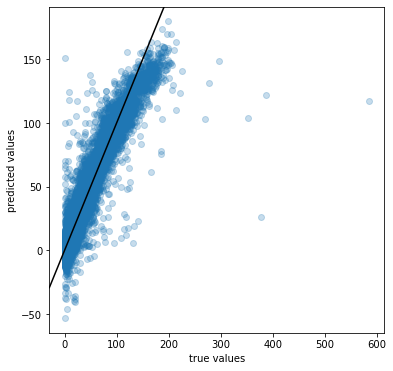

In [82]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [83]:
columns = []
columns.append('cec_iso.11260_cmolc.kg')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,cec_iso.11260_cmolc.kg,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,7.2,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,13.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,24.6,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,20.6,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,15.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113864,9.7,0.245015,0.224416,0.206519,0.191577,0.179569,0.170252,0.163268,0.158218,0.154717,...,0.458799,0.458305,0.457847,0.457396,0.456953,0.456555,0.456244,0.456026,0.455895,0.455810
113865,7.2,0.204041,0.186489,0.171210,0.158381,0.147981,0.139833,0.133658,0.129136,0.125906,...,0.427798,0.427246,0.426737,0.426303,0.425913,0.425548,0.425225,0.424973,0.424812,0.424725
113866,7.7,0.202215,0.186067,0.171907,0.159955,0.150233,0.142605,0.136818,0.132574,0.129538,...,0.398189,0.397701,0.397237,0.396807,0.396417,0.396091,0.395835,0.395633,0.395486,0.395359
113867,12.6,0.213318,0.195800,0.180749,0.168387,0.158611,0.151115,0.145547,0.141550,0.138797,...,0.395874,0.395001,0.394189,0.393430,0.392743,0.392145,0.391597,0.391107,0.390716,0.390309


In [84]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['cec_iso.11260_cmolc.kg']

RMSE: 82.3396655515122
R^2: 0.5869131780866674
bias: 5.378448787979174
RPIQ: 0.16691795767516548


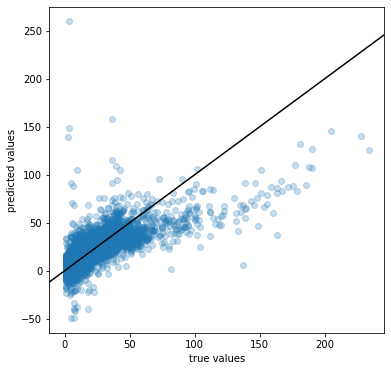

In [85]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# WATER RETENTION

## KSSL MIR

In [86]:
columns = []
columns.append('wr.1500kPa_usda.a417_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,wr.1500kPa_usda.a417_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,14.53674,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,16.20553,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,20.42360,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,17.88413,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,15.64417,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,8.73656,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,7.47283,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,11.14600,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,15.84158,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [87]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['wr.1500kPa_usda.a417_w.pct']

RMSE: 46.664707533176596
R^2: 0.8228603559038045
bias: 3.4358030404161446
RPIQ: 0.21755242183020304


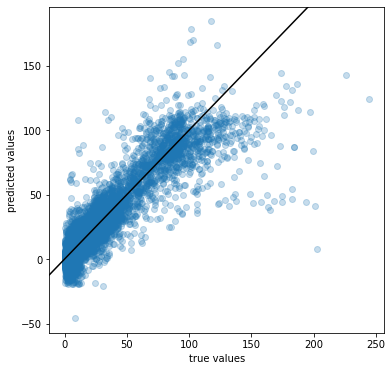

In [88]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# NITROGEN

## KSSL MIR

In [89]:
columns = []
columns.append('n.tot_usda.a623_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_usda.a623_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,0.30898,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,0.15974,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,0.08458,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.08744,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.03378,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.06953,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.07152,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.08750,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.05180,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [90]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['n.tot_usda.a623_w.pct']

RMSE: 0.09230530473021069
R^2: 0.7900252512313901
bias: 0.10053514584571863
RPIQ: 3.161280892654068


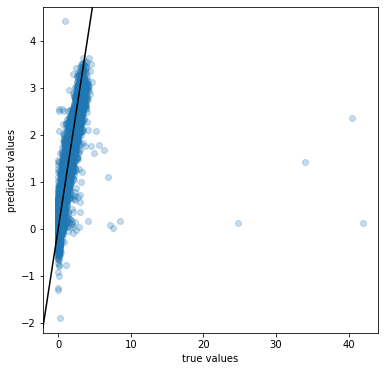

In [91]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [92]:
columns = []
columns.append('n.tot_usda.a623_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_usda.a623_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,0.20601,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,0.22330,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,0.14873,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,0.10968,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,0.03284,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,0.08415,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,0.15948,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,0.07306,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,0.47058,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [93]:
X = pd.DataFrame(data=data[visnir_columns], columns=visnir_columns)
y = data['n.tot_usda.a623_w.pct']

RMSE: 0.14219369322294462
R^2: 0.7488247667963273
bias: 0.2585573540662472
RPIQ: 6.560022946795989


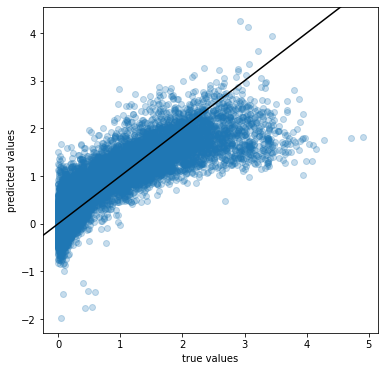

In [94]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [95]:
columns = []
columns.append('n.tot_iso.11261_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_iso.11261_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.53,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.21,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,0.14,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,0.16,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,0.26,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.13,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.13,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.09,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.06,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [96]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['n.tot_iso.11261_w.pct']

RMSE: 0.03222304915052237
R^2: 0.7628727203688306
bias: 0.11467715682072947
RPIQ: 8.026501908776249


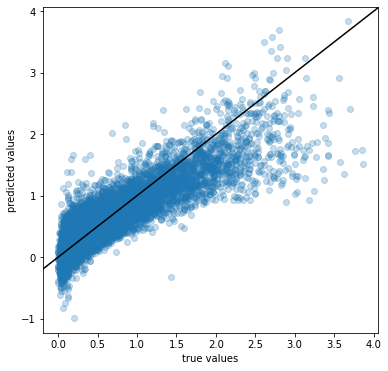

In [97]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CALCIUM

## KSSL MIR

In [98]:
columns = []
columns.append('ca.ext_usda.a722_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ca.ext_usda.a722_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,13.88126,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,15.72011,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,21.14528,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,29.25669,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,34.91432,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,40.35338,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,40.39062,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,25.29846,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,57.57273,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [99]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['ca.ext_usda.a722_cmolc.kg']

RMSE: 127.56962473867534
R^2: 0.8843473938796913
bias: 6.057732615492385
RPIQ: 0.201958050534239


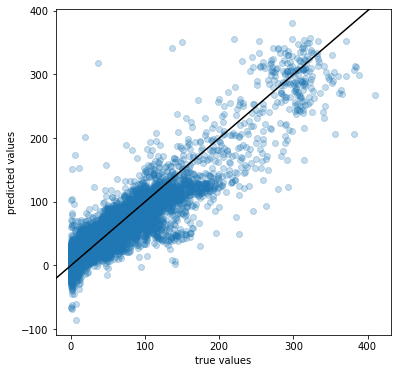

In [100]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# POTASSIUM

## KSSL MIR

In [101]:
columns = []
columns.append('k.ext_usda.a725_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,k.ext_usda.a725_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,0.41300,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,0.28625,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,0.42491,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.44901,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.37489,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.61695,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.20224,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,1.49763,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,2.68437,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [102]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['k.ext_usda.a725_cmolc.kg']

RMSE: 0.5690743053484301
R^2: 0.46813325008879125
bias: 0.41693765426729873
RPIQ: 1.3747311568789917


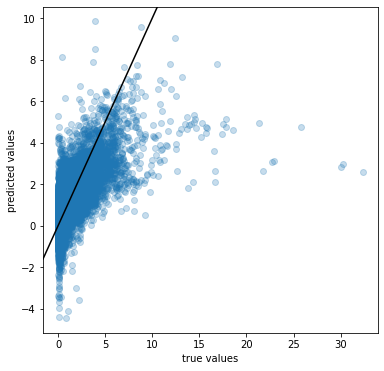

In [103]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [104]:
columns = []
columns.append('k.ext_usda.a725_cmolc.kg')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,k.ext_usda.a725_cmolc.kg,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.449639,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.635327,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,2.512149,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,1.427695,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,2.041537,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,5.744539,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,3.367947,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,2.450765,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,2.613944,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [105]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['k.ext_usda.a725_cmolc.kg']

RMSE: 0.9417887518936873
R^2: 0.2825124234086389
bias: 0.5193718340877955
RPIQ: 0.8983792590592217


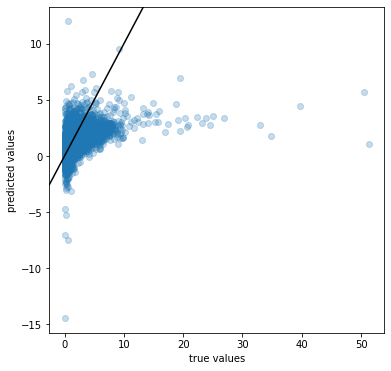

In [106]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# IRON

## KSSL MIR

In [107]:
columns = []
columns.append('fe.dith_usda.a66_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,fe.dith_usda.a66_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,1.09028,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.51359,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,2.41690,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,1.73210,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,1.37132,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.36524,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.26761,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.40614,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.40668,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [108]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['fe.dith_usda.a66_w.pct']

RMSE: 0.5253297126817944
R^2: 0.7935147447332184
bias: 0.4272613538316279
RPIQ: 2.355134569957426


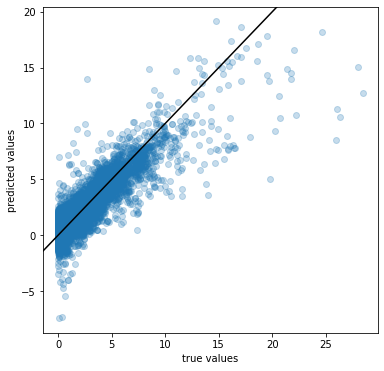

In [109]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# MAGNESIUM

## KSSL MIR

In [110]:
columns = []
columns.append('mg.ext_usda.a724_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,mg.ext_usda.a724_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,4.15291,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,5.48653,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,8.42312,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,8.55486,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,6.99786,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.45291,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.36408,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,2.18885,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,5.81614,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [111]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['mg.ext_usda.a724_cmolc.kg']

RMSE: 19.612805496530438
R^2: 0.7175424658456766
bias: 2.513597121316221
RPIQ: 0.3338866907856419


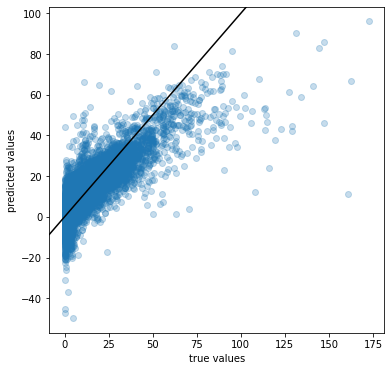

In [112]:
model = PLSRegression(n_components=120)

y_pred = cross_val_predict(model, X, y, cv=10)

rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
bias = mean_absolute_error(y, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()